In [ ]:
# Install Libraris
# !pip install textblob
# !pip install tweepy

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [4]:
# Authentication Keys
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""


auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

Please enter keyword or hashtag to search: Wetherspoon
Please enter how many tweets to analyze: 100
If you've got high training costs, or it's not straightforward to hire, that might make sense. But the kinds of job… https://t.co/ZZ8zchv1iK
RT @angie_karan: Animal abuse runs rampant in agriculture facilities — shut them down. 

...It takes a small mind and cold heart to hurt th…
@heavyspoilers I've stopped going to all wetherspoon pubs foods crap there anyway.
Extreme Emergency #CurryThursday #Pontypridd #WithChips (@ The Tumble Inn (Wetherspoon) in Pontypridd)… https://t.co/6F7z4qt0Mu
Property moves: which sites have been reopened, revamped or changed hands in the past week? #ukpubs https://t.co/3fM2uUc6RB
@ReidWeb Again, not sure if that's just because all Wetherspoon's in the UK have to have it, that's why the NI ones have it too
@ReidWeb I was at Wetherspoon's last week and they asked everyone to use the NHS track &amp; trace. Not sure if that's… https://t.co/u3fv0x5zsF
@CCriadoPer

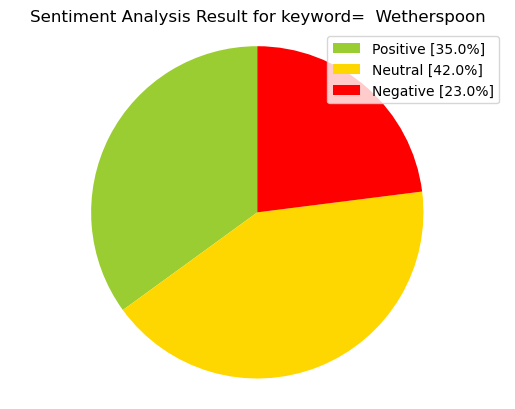

In [19]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

positive  = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
        #print(analysis)
    
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
        print(analysis)
    
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1
        #print(analysis)

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold','red']

patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(patches, labels, loc='best')
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()